<h1><center></center></h1>
<h1><center>Elevvo Internship</center></h1>
<h1><center>Task 1</center></h1>
<h2><center>Sentiment Analysis on Product Reviews</center></h2>

# **Hands on Task 1**

- We build a sentiment analysis pipeline using the IMDb Movie Review Dataset.
- We clean and preprocess the text (lowercasing, punctuation removal, lemmatization).
- We apply `TF-IDF` to vectorize the reviews.
- We train two models: Logistic Regression and Naive Bayes.
- Finally, we evaluate them and visualize common positive vs. negative words.

# **1- Data Collection**

**Install Hugging Face datasets library**

In [1]:
!pip install datasets --quiet

**Import required libraries**

In [2]:
from datasets import load_dataset
import pandas as pd

**load IMDb dataset**

In [3]:
dataset = load_dataset("imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

**Convert dataset into Pandas DataFrames for training and testing**

In [4]:
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

df_train.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


**Check class balance (0 = Negative, 1 = Positive)**

In [5]:
df_train['label'].value_counts()

,count
label,
0,12500
1,12500


**Save original data as CSV**

In [6]:
df_train.to_csv("imdb_train.csv", index=False)
df_test.to_csv("imdb_test.csv", index=False)

# **2- Preprocessing**

**Import NLP preprocessing libraries (NLTK, regex)**

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**Download NLTK resources (stopwords, tokenizer, lemmatizer)**

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Initialize stopword list and lemmatizer**

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

**Define text preprocessing function**

In [10]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(processed_tokens)

**Apply preprocessing to all reviews in train/test sets**

In [11]:
df_train['processed_text'] = df_train['text'].apply(preprocess_text)
df_test['processed_text'] = df_test['text'].apply(preprocess_text)

**Preview original vs. processed text**

In [12]:
df_train[['text', 'processed_text']].head()

,text,processed_text
0,I rented I AM CURIOUS-YELLOW from my video sto...,rented curiousyellow video store controversy s...
1,"""I Am Curious: Yellow"" is a risible and preten...",curious yellow risible pretentious steaming pi...
2,If only to avoid making this type of film in t...,avoid making type film future film interesting...
3,This film was probably inspired by Godard's Ma...,film probably inspired godard masculin féminin...
4,"Oh, brother...after hearing about this ridicul...",oh brotherafter hearing ridiculous film umptee...


# **3- Vectorization**

**Import TF-IDF vectorizer**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Convert preprocessed text into numerical vectors**

In [14]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['processed_text'])
X_test = tfidf.transform(df_test['processed_text'])

**Extract target labels for training and testing**

In [15]:
y_train = df_train['label']
y_test = df_test['label']

**Check resulting matrix sizes**

In [16]:
print("TF-IDF Matrix (Train):", X_train.shape)
print("TF-IDF Matrix (Test):", X_test.shape)

TF-IDF Matrix (Train): (25000, 109229)
TF-IDF Matrix (Test): (25000, 109229)


# **4- Model Training & Evaluation**

**Import classification models and evaluation tools**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Train logistic regression model**

In [18]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Predict sentiment on test set**

In [19]:
y_pred_logreg = logreg.predict(X_test)

**Print evaluation metrics**

In [20]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg, target_names=["Negative", "Positive"]))

Logistic Regression Results:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



**Train Naive Bayes model**

In [21]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

**Predict**

In [22]:
y_pred_nb = nb.predict(X_test)

**Print evaluation metrics**

In [23]:
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb, target_names=["Negative", "Positive"]))

Naive Bayes Results:
              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84     12500
    Positive       0.87      0.78      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



**Confusion Matrix**

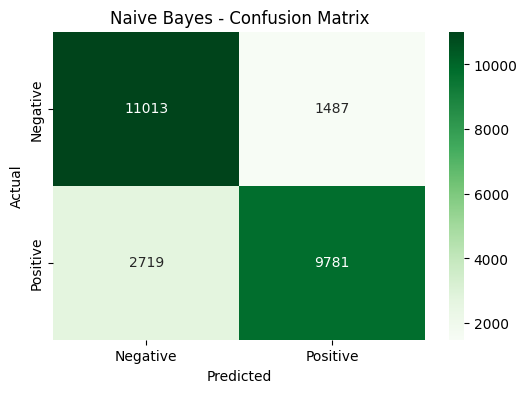

In [24]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **5- Bonus: Word Cloud Visualization**

**Install WordCloud package**

In [25]:
!pip install wordcloud --quiet

**Import word cloud tools**

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**Separate processed reviews by sentiment label**

In [27]:
positive_reviews = df_train[df_train['label'] == 1]['processed_text']
negative_reviews = df_train[df_train['label'] == 0]['processed_text']

# Combine all text into one big string
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

**Generate and display word cloud for positive reviews**

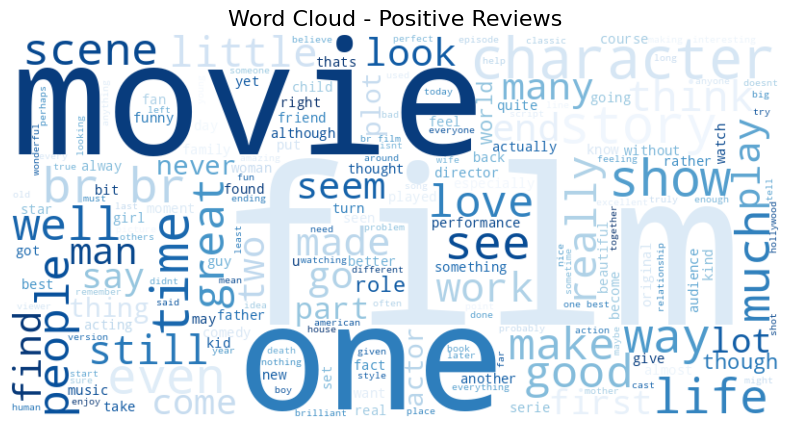

In [28]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews", fontsize=16)
plt.show()

**Generate and display word cloud for negative reviews**

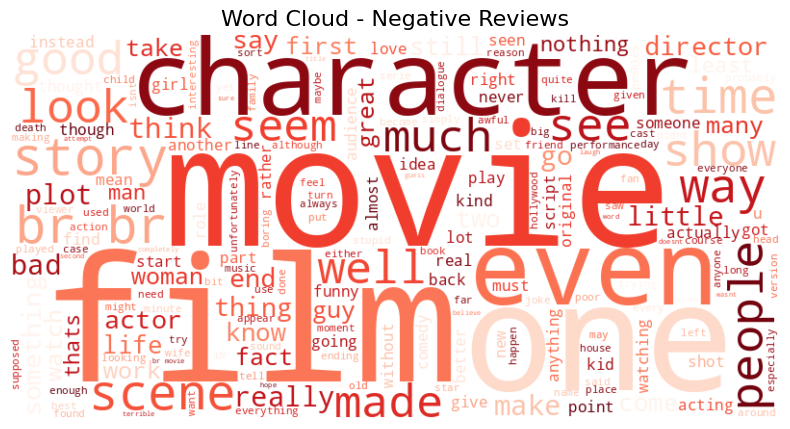

In [29]:
# Word cloud for Negative Reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews", fontsize=16)
plt.show()

# **6- Summary and Results**

**Import accuracy metric for model comparison**

In [30]:
from sklearn.metrics import accuracy_score

**Accuracy comparison**

In [31]:
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f" Logistic Regression Accuracy: {acc_logreg:.4f}")
print(f" Naive Bayes Accuracy: {acc_nb:.4f}")

 Logistic Regression Accuracy: 0.8786
 Naive Bayes Accuracy: 0.8318


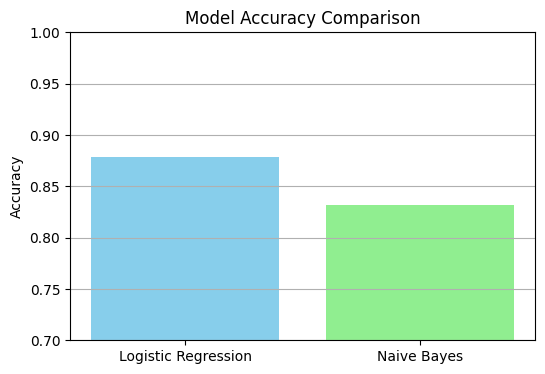

In [32]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes']
scores = [acc_logreg, acc_nb]

plt.figure(figsize=(6,4))
plt.bar(models, scores, color=['skyblue', 'lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1.0)
plt.grid(True, axis='y')
plt.show()


# **7- Save Outputs (CSV, Plots, Model)**

**Save preprocessed training and test datasets**

In [33]:
df_train.to_csv("imdb_train_processed.csv", index=False)
df_test.to_csv("imdb_test_processed.csv", index=False)
print(" Preprocessed datasets saved.")

 Preprocessed datasets saved.


**Save trained scikit-learn models to disk**

In [34]:
import joblib

joblib.dump(logreg, "logistic_regression_model.pkl")
joblib.dump(nb, "naive_bayes_model.pkl")
print(" Sklearn models saved.")

 Sklearn models saved.


**Save word cloud images to files**

In [35]:
wordcloud_pos.to_file("wordcloud_positive.png")
wordcloud_neg.to_file("wordcloud_negative.png")
print(" Word clouds saved as images.")

 Word clouds saved as images.


**Save the Trained TF-IDF Vectorizer**

In [36]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("TF-IDF vectorizer saved.")

TF-IDF vectorizer saved.
